### Quantum state tomography by on-line measuring with IC&SIC-POVM and MMW method
(toy example with no noise)

The problem of state tomography is estimating the state of the quantum system that is fully described by its density matrix $\rho$ from the measuarements with possible outcomes $\{0, 1\}$ of some observables $\{E_i\}$ where the probability to obtain "1" when measure the observable $E_i$ is $p(m) = \operatorname{Tr}(E_m \rho)$

In [1]:
using LinearAlgebra
using Kronecker
using IterTools
using Statistics
using PyPlot

Function to generate an random $n \times n$ desity matrix we want to indentify (consider unknown)

In our toy example consider $2 \times 2$ desity matrix:
\begin{align}
  \rho = 
        \left(
        \begin{array}{ccccc}
            \rho_{00}   &   \rho_{01}  \\
            \rho_{01}^*  &  \rho_{11} \\
        \end{array}
        \right)
\end{align}

In [2]:
function ρᵣₐₙ(n)
    # return a random density matrix
    ρ = -1 .+ 2 * rand(n, n) 
    ρ += im * (-1 .+ 2 * rand(n, n))  
    ρ = ρ * ρ'
    Hermitian(ρ / tr(ρ))
end
ρᵣₐₙ(2)

2×2 Hermitian{ComplexF64, Matrix{ComplexF64}}:
   0.462199+0.0im       -0.0570153-0.236289im
 -0.0570153+0.236289im    0.537801+0.0im

We can use fidelity to check the similarity of quantum states
$F = \left( \operatorname{Tr} \sqrt{\sqrt{\rho} \omega \sqrt{\rho}} \right)^2$

In [3]:
function fidelity(ρ, 𝜔)
    s = sqrt(sqrt(ρ)*𝜔*sqrt(ρ))
    return abs(tr(s)^2)
end 
ρ₁ = ρᵣₐₙ(2)
ρ₂ = [1/2 0; 0 1/2]
println(fidelity(ρ₁, ρ₂))
println(fidelity(ρ₁, ρ₁))

0.6376188977324507
0.9999999999999982


To perform quantun state tomography we need to measure quantum system with <br> a set of Positive operator-valued measure (POVM) operators $\{E_i\}$ that should be <b> informationally complete (IC)</b>. 

### POVM Definition

A POVM over a $d$-dimensional Hilbert space $\mathcal{H}$ is a set of $m$ positive-semidefinite operators operators $E = \{E_i\ | i \in \{1,...,m\} \}$ on the Hilbert space that sum to identity: 
$\sum_{i=1}^m{E_i} = I$.

 ### IS POVM and SIC POVM definitions
 If a POVM consists of at least $d^{2}$ operators which span the space of self-adjoint operators $\mathcal{L}(\mathcal {H})$, <br> it is said to be an <b> informationally complete POVM (IC-POVM)</b>. <br> IC-POVMs consisting of exactly $ d^{2}$ elements are called minimal.
 
A set of $d^{2}$ rank-1 projectors $\Pi =\left\{\Pi_{i}\mid i\in \{1,\ldots ,d^{2}\}\land \Pi_{i}^{2}=\Pi _{i}\right\}$ which have equal pairwise Hilbert–Schmidt inner products,
\begin{align}
\operatorname{Tr}(\Pi_i \Pi_j) = \frac{d \delta_{ij} + 1}{d+1},
\end{align}
defines a minimal IC-POVM $E = \{E_i\ | i \in \{1,...,d^2\} \land E_i  = \frac{1}{d} \Pi_i \land \Pi_i \in \Pi \}$ called 
<b> symmetric, informationally complete, positive operator-valued measure (SIC-POVM) </b>.

https://en.wikipedia.org/wiki/SIC-POVM

#### SIC POVM example for one qubit
In the Bloch sphere representation of a qubit, the states of a SIC-POVM form a regular tetrahedron:
<img src="Regular_tetrahedron_inscribed_in_a_sphere.svg.png" alt="One qubit SIC-POVM Tetrahedron" style="width:400px;"/>

For one qubit ($d=2$) we can consider the following set of SIC-POVM ket-states:

\begin{align}
|\psi_1 \rangle  = |0\rangle, \quad
|\psi_2 \rangle  = \frac{1}{\sqrt{3}}|0\rangle + - \sqrt{\frac{2}{3}}|1\rangle, \quad
|\psi_3 \rangle  = \frac{1}{\sqrt{3}}|0\rangle + \sqrt{\frac{2}{3}} e^{i \frac{2 \pi}{3}}|1\rangle, \quad
|\psi_4 \rangle  = \frac{1}{\sqrt{3}}|0\rangle + \sqrt{\frac{2}{3}} e^{i \frac{4 \pi}{3}}|1\rangle \quad
\end{align}

we use Dirac bra-ket notation
$|\psi\rangle = \langle \psi |^\dagger$ :
\begin{align}
|\psi\rangle =
 \begin{pmatrix}
 \alpha_1 + i \beta_1 \\
 \alpha_2 + i \beta_2
 \end{pmatrix}, \quad 
 \langle \psi | = \begin{pmatrix}
 \alpha_1 - i \beta_1 &
 \alpha_2 - i \beta_2
 \end{pmatrix}, \quad \alpha_i, \beta_i \in \mathbb{R}
\end{align}

This set of states $\{ |\psi_i \rangle \}$corresponds to the set of projectors $\{ \Pi_i = |\psi_i \rangle \langle \psi_i | \}$ <br> and corresponding set of SIC-POVM measurement operators<br>
$E = \{E_i\ | i \in \{1,...,4\} \land  E_i  = \frac{1}{2} \Pi_i \}$ on the Hilbert space that sum to identity $\sum_{i=1}^m{E_i} = I$.

\begin{align}
 \Pi_1 = 2E_1 = |\psi_1\rangle \langle \psi_1|= |0\rangle \langle 0|=
          \left(
        \begin{array}{ccccc}
            1  \\
            0  \\
        \end{array}
        \right) 
          \left(
        \begin{array}{ccccc}
            1   &   0  \\
        \end{array}
        \right) = 
        \left(
        \begin{array}{ccccc}
            1   &  0 \\
            0   &  0 \\
        \end{array}
        \right)
\end{align}



In [4]:
Π₁ = [1 0; 0 0]
E₁ = [1/2 0; 0 0]

2×2 Matrix{Float64}:
 0.5  0.0
 0.0  0.0

\begin{align}
 \Pi_2 = 2 E_2 = |\psi_2\rangle \langle \psi_2|= 
 \left(\frac{1}{\sqrt 3}|0\rangle  + \sqrt{\frac{2}{3}}|1\rangle \right) \left(\frac{1}{\sqrt 3}\langle 0| + \sqrt{\frac{2}{3}}\langle 1| \right) = 
     \left(
        \begin{array}{ccccc}
            1/\sqrt{3}   \\  \sqrt{\frac{2}{3}} 
        \end{array}        
        \right)
        \left(
        \begin{array}{ccccc}
            1/\sqrt{3}   &  \sqrt{\frac{2}{3}} \\
        \end{array}        
        \right) 
         =
        \left(
        \begin{array}{ccccc}
           1/3 &  \sqrt{2}/3 \\
           \sqrt{2}/3 & 2/3 \\
        \end{array}        
        \right)       
\end{align}

In [5]:
Π₂ = [1/3 √2/3; √2/3 2/3]
E₂ = [1/6 √2/6; √2/6 2/6]

2×2 Matrix{Float64}:
 0.166667  0.235702
 0.235702  0.333333

\begin{align}
 \Pi_3 = 2  E_3 = |\psi_3\rangle \langle \psi_3|= 
 \left(\frac{1}{\sqrt 3}|0\rangle  + \sqrt{\frac{2}{3}}e^{i\frac{2 \pi}{3}}|1\rangle \right) \left(\frac{1}{\sqrt 3}\langle 0| + \sqrt{\frac{2}{3}}e^{-i\frac{2 \pi}{3}}\langle 1| \right) =
        \left(
        \begin{array}{ccccc}
           1/3 &  \sqrt{2}e^{-i\frac{2 \pi}{3}}/3 \\
           \sqrt{2}e^{i\frac{2 \pi}{3}}/3 & 2/3 \\
        \end{array}        
        \right)       
\end{align}

In [6]:
Π₃ = [1/3 exp(im*2π/3)√2/3; exp(-im*2π/3)√2/3 2/3]
E₃ = [1/6 exp(im*2π/3)√2/6; exp(-im*2π/3)√2/6 2/6]

2×2 Matrix{ComplexF64}:
  0.166667+0.0im       -0.117851+0.204124im
 -0.117851-0.204124im   0.333333+0.0im

\begin{align}
 \Pi_4 = 2  E_4 = |\psi_4\rangle \langle \psi_4|= 
 \left(\frac{1}{\sqrt 3}|0\rangle  + \sqrt{\frac{2}{3}}e^{i\frac{4 \pi}{3}}|1\rangle \right) \left(\frac{1}{\sqrt 3}\langle 0| + \sqrt{\frac{2}{3}}e^{-i\frac{4 \pi}{3}}\langle 1| \right) =
        \left(
        \begin{array}{ccccc}
           1/3 &  \sqrt{2}e^{-i\frac{4 \pi}{3}}/3 \\
           \sqrt{2}e^{i\frac{4 \pi}{3}}/3 & 2/3 \\
        \end{array}        
        \right)       
\end{align}

In [7]:
Π₄ = [1/3 exp(im*4π/3)√2/3; exp(-im*4π/3)√2/3 2/3]
E₄ = [1/6 exp(im*4π/3)√2/6; exp(-im*4π/3)√2/6 2/6]

2×2 Matrix{ComplexF64}:
  0.166667+0.0im       -0.117851-0.204124im
 -0.117851+0.204124im   0.333333+0.0im

Check $\sum_{i=1}^m{E_i} = I$

In [8]:
E₁ + E₂ + E₃ + E₄

2×2 Matrix{ComplexF64}:
          1.0+0.0im          -5.55112e-17+5.55112e-17im
 -5.55112e-17-5.55112e-17im           1.0+0.0im

#### Genetate IC-POVM for $n$ qubits

Conside 2 qubit first

In [9]:
n = 2
d = 2^n

4

Lets $ \{ \Pi_k \}_{k=1}^4 = \{ \Pi_1, \Pi_2, \Pi_3, \Pi_4 \}$ - are projectors for SIC POVM as described above and
as $ E_i  = \frac{1}{d} \Pi_i = \frac{1}{2} \Pi_i$ for one qubit $(d=2)$ then 
$ \{ E_k \}_{k=1}^4 = \{ E_1, E_2, E_3, E_4 \} = \{ \Pi_1/2, \Pi_2/2, \Pi_3/2, \Pi_4/2 \} $ - minimal information complete POVM for a single qubit

In [10]:
Π₍1q₎ = [Π₁, Π₂, Π₃, Π₄]; 
E₍1q₎ = [Π₁, Π₂, Π₃, Π₄]/2;

Lets show that $ \{ E_k \otimes E_l \}_{k,l=1}^4 $ - is a minimal information complete POVM for a 2 qubits

Positivity follows trivially, then chech the sum
\begin{align}
\sum_{k,l=1}^4 E_k \otimes E_l  = \sum_{k=1}^4 E_k \otimes \sum_{l=1}^4 E_l = I_2 \otimes I_2 = I_4
\end{align}

#### IC POVM operators set for n-qubits
For arbitrary number of qubits we will have the following IC set of POVM operators <br>
 $ \{ E_{i_1} \otimes E_{i_2} \otimes ... \otimes E_{i_{n-1}} \otimes E_{i_n} \}_{i_1,i_2, ... i_n =1}^4 $ - is a minimal information complete POVM for a $n$ qubits, <br>
 where $ \{ E_k \}_{k=1}^4 = \{ E_1, E_2, E_3, E_4 \} $ - information complete POVM for a single qubit.

The following function implements the generation of IC POVM set of operators for arbitrary number of qubits $n$ and arbitrary set of initial IC POVM operators for one qubit.

In [41]:
function ICPOVM(E₍1q₎, n)
    # E - informationally complete (IC) set of POVM operators for one qubit
    # n - number of qubits
    E₍nq₎ = [convert(Matrix{ComplexF64}, reduce(⊗, ops)) for ops in product(repeat([E₍1q₎], n)...)]
    return E₍nq₎
end    

ICPOVM (generic function with 1 method)

In [32]:
E₍2q₎ = ICPOVM(E₍1q₎, 2)
abs.(sum(E₍2q₎)) ≈ I
#E₍2q₎[1]

true

#### Probability to obtain "1" when measure the observable $E_m$ is 

$p(m) = \operatorname{Tr}(E_m \rho)$

for example:

In [13]:
p₁ = abs(tr(E₍2q₎[1]*ρᵣₐₙ(4)))

0.0717775341493033

We can generate sequence that simulate measurements $Y$ with outcomes $\{0,1\}$ of the particular observable, for example

In [14]:
using Random, Distributions
𝑌₁ = rand(Bernoulli(p₁), 100)
print(𝑌₁')
mean(𝑌₁)

Bool[0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

0.06

#### MAIN PART 

#### 01. Genarate random density matrix (consider unknown)

In [15]:
n = 2
d = n^2
ρ = ρᵣₐₙ(d)
#ρ = [1/2 0 ; 0 1/2]
#ρ = [1 0 ; 0 0]

4×4 Hermitian{ComplexF64, Matrix{ComplexF64}}:
    0.231679+0.0im         …   -0.182208-0.00658168im
 -0.00054576-0.0177044im      -0.0501105-0.0262197im
   0.0828081+0.0412736im       -0.121478-0.00802226im
   -0.182208+0.00658168im       0.310799+0.0im

#### 02. Simulate measuremnets with SIC-POVM operators

In [33]:
T = 100 # number of measurements for each operator 

# Simulate measurements
Ys = [rand(Bernoulli(abs(tr(Eᵢ*ρ))), T) for Eᵢ in E₍2q₎]

# Combine all measurements in one sequence
E = []; Y = []

for t in 1:T
    for i in 1:length(E₍2q₎)
    push!(E, E₍2q₎[i])
    push!(Y, Ys[i][t])
    end
end

#### Matrix Multiplicative Weights (MMW) algorithm [Tsuda et al., 2005]
as described in Online Learning of Quantum States by Elad Hazan and others

#### 1. Set $\omega_1 := 2^{-n} I$
for 2 qubits it is just 

\begin{align}
    \omega_1 := \begin{pmatrix}
        1/4 & 0 & 0 & 0\\
        0 & 1/4 & 0 & 0\\
        0 & 0 & 1/4 & 0\\
        0 & 0 & 0 & 1/4
    \end{pmatrix}
\end{align}

In [17]:
𝜔₁ = Matrix(I(d)/2^n)

4×4 Matrix{Float64}:
 0.25  0.0   0.0   0.0
 0.0   0.25  0.0   0.0
 0.0   0.0   0.25  0.0
 0.0   0.0   0.0   0.25

#### 2. Update $\omega_{t+1}$:

To predict $\omega_{t+1}$ we use the gradient:
$ \nabla_t (\omega_t) := 2\left({\operatorname{Tr}(E_t \omega_t) - Y_t} \right) E_t$ 

In [18]:
function ∇(𝜔ₜ, 𝐸ₜ, 𝑌ₜ)
    return 2*(tr(𝐸ₜ*𝜔ₜ)-𝑌ₜ)*𝐸ₜ
end

∇ (generic function with 1 method)

In [19]:
∇(𝜔₁, E₍2q₎[1], 1)
∇(𝜔₁, E₍2q₎[1], 0)

4×4 Kronecker.KroneckerProduct{ComplexF64, Matrix{ComplexF64}, Matrix{ComplexF64}}:
 0.03125+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
     0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
     0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
     0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im

$ \omega_{t+1} := \frac{\operatorname{exp}(-\frac{\eta}{L}\sum_{\tau=1}^t \nabla_t)}{\operatorname{Tr}(\operatorname{exp}(-\frac{\eta}{L}\sum_{\tau=1}^t \nabla_t))}
$

In [20]:
function next_𝜔(𝜔, 𝐸, 𝑌)
    e = exp(-sum([∇(𝜔[i], 𝐸[i], 𝑌[i]) for i in 1:length(𝜔)]))
    return e/tr(e)
end

next_𝜔 (generic function with 1 method)

##### Main loop

In [34]:
n = 2
d = 2^n
#ρ = ρᵣₐₙ(d)
ρ = [1 0 0 0; 0 0 0 0; 0 0 0 0; 0 0 0 0 ]

𝜔₁ = Matrix(I(d)/2^n)

𝜔 = []
push!(𝜔, 𝜔₁)

F = []

for t in 1:length(Y)
    𝜔ₜ = next_𝜔(𝜔, E, Y)
    push!(𝜔, 𝜔ₜ)
    push!(F, fidelity(ρ, 𝜔ₜ))
end  

Final fidelity:0.880289889589827PyObject Text(0.5, 1.0, '$F = \\left( \\operatorname{Tr} \\sqrt{\\sqrt{\\rho} \\omega \\sqrt{\\rho}} \\right)^2$')

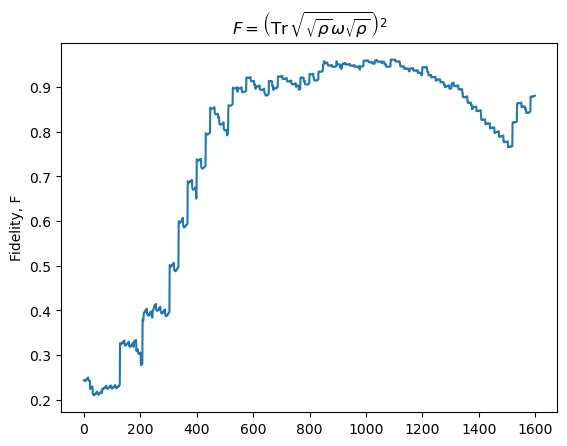

In [35]:
print("Final fidelity:", fidelity(ρ, 𝜔[end]))

plt = plot(F, label="")
plt = ylabel("Fidelity, F")
plt = title( latexstring(L"F = \left( \operatorname{Tr} \sqrt{\sqrt{\rho} \omega \sqrt{\rho}} \right)^2"))
show(plt)

In [22]:
𝜔[end]

4×4 Matrix{Float64}:
 0.25  0.0   0.0   0.0
 0.0   0.25  0.0   0.0
 0.0   0.0   0.25  0.0
 0.0   0.0   0.0   0.25

In [23]:
ρ 

4×4 Matrix{Int64}:
 1  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0

Try all together in one cell for $n=3$ qubit

Final fidelity:0.7661855284555711PyObject Text(0.5, 1.0, '$F = \\left( \\operatorname{Tr} \\sqrt{\\sqrt{\\rho} \\omega \\sqrt{\\rho}} \\right)^2$')

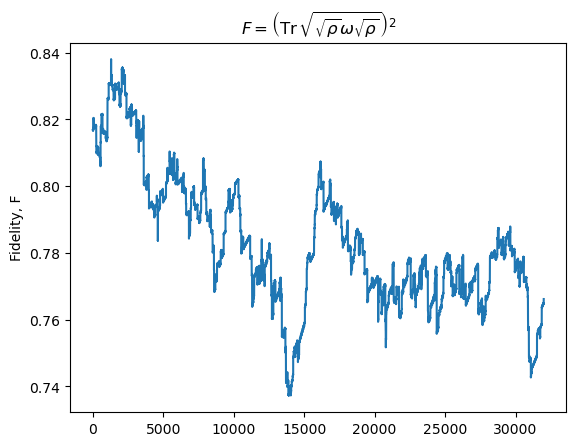

In [45]:
n = 3         # number of qubits
d = 2^n       # dimentionality of Hilbert spase 
ρ = ρᵣₐₙ(d)   # random density matrix (consider unknown)

T = 500      # number of measurements for each operator 

# Generate operators

E₍nq₎ = ICPOVM(E₍1q₎, n)

# Simulate measurements
Ys = [ rand(Bernoulli(abs(tr(Eᵢ*ρ))), T) for Eᵢ in E₍nq₎]

# Combine all measurements in one sequence 
E = [] ; Y = []

@time for t in 1:T
    for i in 1:length(E₍nq₎)
    push!(E, E₍nq₎[i])
    push!(Y, Ys[i][t])
    end
end

# Choose initial guess

𝜔₁ = Matrix(I(d)/2^n)
𝜔 = []
push!(𝜔, 𝜔₁)

F = []

# Run main loop

@time for t in 1:length(Y)
    𝜔ₜ = next_𝜔(𝜔, E, Y)
    push!(𝜔, 𝜔ₜ)
    push!(F, fidelity(ρ, 𝜔ₜ))
end  

# Show results

print("Final fidelity:", fidelity(ρ, 𝜔[end]))

plt = plot(F, label="")
plt = ylabel("Fidelity, F")
plt = title( latexstring(L"F = \left( \operatorname{Tr} \sqrt{\sqrt{\rho} \omega \sqrt{\rho}} \right)^2"))
show(plt)


In [46]:
𝜔[end]

8×8 Matrix{ComplexF64}:
    0.175427+7.26662e-18im  …     0.0279198+0.0167583im
  -0.0274211+0.0980503im         -0.0260363+0.0363866im
  -0.0137835+0.00785315im      -0.000104608+0.0630016im
  -0.0163637+0.0231951im        -0.00193273-0.0167105im
 -0.00083621+0.0232917im          0.0081563+0.0302984im
  -0.0244131-0.0548828im    …    -0.0180311-0.0136711im
    0.101156-0.0203229im         -0.0282817+0.0412155im
   0.0279198-0.0167583im           0.129361+3.61444e-18im

In [47]:
ρ 

8×8 Hermitian{ComplexF64, Matrix{ComplexF64}}:
    0.133074+0.0im         …  -0.0340273+0.015205im
  -0.0217333+0.0370443im       -0.053114-0.0165206im
 -0.00615634-0.00479062im     0.00464469-0.00488382im
  -0.0257038-0.0109454im      -0.0273308-0.00411523im
 -0.00159208+0.0193315im      -0.0126358+0.0134394im
  -0.0194088+0.020591im    …   0.0418739+0.0124938im
   0.0865925-0.0157213im      -0.0723922+0.0460417im
  -0.0340273-0.015205im        0.0968217+0.0im